# 01. Electricity Load Diagrams – Data Loading & Initial Exploration

## Objective
This notebook performs the following tasks:
- Load the Electricity Load Diagrams dataset from a local CSV file (downloaded and normalized from UCI).
- Transform the raw data into a time-series format.
- Conduct a preliminary check of the data structure and quality (missing values, zeros).
- Perform light exploratory visualization to understand electricity consumption patterns.

## 1. Setup and Imports
Install the core libraries in requirements.txt.

In [ ]:
# Core
import numpy as np
import pandas as pd
import sys
import os

# Visualization
import matplotlib.pyplot as plt

# Add the root directory to the path so Python can find the 'src' module
sys.path.append(os.path.abspath('../'))
from src.data_loader import load_raw_data

# Display configuration
pd.set_option("display.max_columns", 50)
pd.set_option("display.width", 120)

# Check Python version (Requires 3.10.11 as specified in .python-version)
print(f"Python version: {sys.version}")

Python version: 3.10.11 (tags/v3.10.11:7d4cc5a, Apr  5 2023, 00:38:17) [MSC v.1929 64 bit (AMD64)]


## 2. Load Dataset – via src/data_loader.py
Instead of using load_dataset from Hugging Face (which encounters script errors), we load the CSV file that was generated by scripts/download_data.py, which is already integrated into data_loader.py.

In [ ]:
# Call the function from src/data_loader.py
try:
    df = load_raw_data()
    print("✅ Data loaded successfully!")
    print(f"📊 Shape: {df.shape[0]} rows, {df.shape[1]} customers.")
except Exception as e:
    print(f"❌ Error: {e}")

✅ Nạp dữ liệu thành công!
📊 Kích thước: 140256 dòng, 370 khách hàng.


## 3. Data Inspection
We examine the last few rows to identify the columns corresponding to the 370 customers (from MT_001 to MT_370).

In [ ]:
# View the last 5 rows
print(f"Index data type: {df.index.dtype}")
print(f"Current first column: {df.columns[0]}")
df.tail()

Kiểu dữ liệu của Index: datetime64[ns]
Cột đầu tiên hiện tại là: MT_001


,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,MT_011,MT_012,MT_013,MT_014,MT_015,MT_016,MT_017,MT_018,MT_019,MT_020,MT_021,MT_022,MT_023,MT_024,MT_025,...,MT_346,MT_347,MT_348,MT_349,MT_350,MT_351,MT_352,MT_353,MT_354,MT_355,MT_356,MT_357,MT_358,MT_359,MT_360,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 00:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 00:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 01:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Check data types and overall memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 140256 entries, 2011-01-01 00:15:00 to 2015-01-01 00:00:00
Columns: 370 entries, MT_001 to MT_370
dtypes: float64(370)
memory usage: 397.0 MB


## 4. Data Quality Check
Electricity load data often contains periods with zero values when customers have not yet had metering devices installed.

In [ ]:
# 1. Check for missing values (NaN)
missing = df.isnull().sum().sum()
print(f"Total number of NaN values: {missing}")

# 2. Check for zero values (a characteristic of this dataset)
zeros_count = (df == 0).sum().sum()
total_cells = df.size
print(f"Total number of zero values: {zeros_count} ({zeros_count / total_cells:.2%})")

# 3. Basic descriptive statistics for a few columns
df.iloc[:, :5].describe()

Tổng số giá trị NaN: 0
Tổng số giá trị bằng 0: 10457342 (20.15%)


,MT_001,MT_002,MT_003,MT_004,MT_005
count,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000
mean,3.970785,20.768480,2.918308,82.184490,37.240309
std,5.983965,13.272415,11.014456,58.248392,26.461327
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.844950,0.000000,36.585366,15.853659
50%,1.269036,24.893314,1.737619,87.398374,39.024390
75%,2.538071,29.871977,1.737619,115.853659,54.878049
max,48.223350,115.220484,151.172893,321.138211,150.000000


## 5. Visual Exploration
Plot the consumption pattern of a sample customer (e.g., MT_001) to observe daily cyclic behavior.

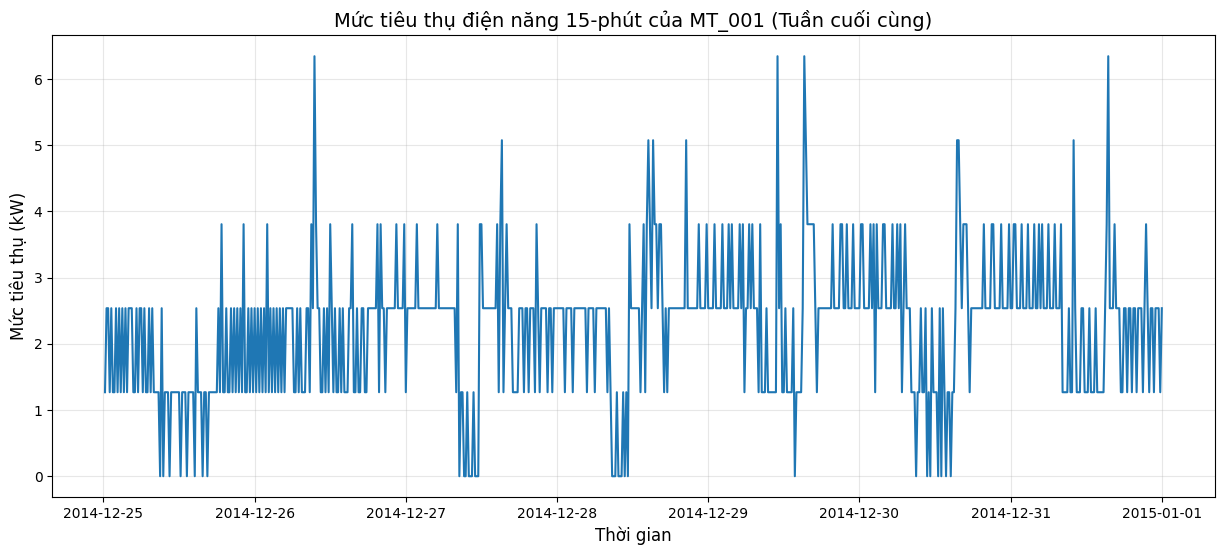

In [ ]:
# Select customer MT_001 and plot the last 7 days of data (96 points/day * 7)
sample_client = 'MT_001'

plt.figure(figsize=(15, 6))
plt.plot(df[sample_client].tail(96 * 7), color='tab:blue', linewidth=1.5)
plt.title(f'15-minute Electricity Consumption of {sample_client} (Last Week)', fontsize=14)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Consumption (kW)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

## 7. Preliminary Conclusion
- Data types: The index column is a Timestamp (sorted in ascending order). All other columns are of type float. MT_001 is the first customer column (column index = 0).
- Structure: The dataset contains 140,256 time points (15-minute frequency) for 370 consumer households.
- Data quality: There are no missing values (NaN). However, a significant proportion of values are zeros, reflecting that customers joined the system at different times.
- Characteristics: The plot reveals a very strong daily seasonality in electricity consumption.
- Next steps: Proceed to notebook 02_eda.ipynb for deeper analysis of seasonal components (daily, weekly, and yearly).